# Pigment and Indices - Correlation & Linear Models
- *Objectives:*
    - Get correlogram of pigment concentration and spectral indices
    - Visualize linear models
    - Export CSV of both data sources 'merged' and filtered
    - Facilitate export & analysis for robust statistical models
        - R lmer mixed models
        - Python stats
    - Plots

In [36]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Path and load data

In [37]:
PATH = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results")

In [38]:
# Pigment dataframe, clean
pigment_df = pd.read_csv(PATH / "pigment-mg-mm.csv", index_col=0)

print(pigment_df.shape)
pigment_df.head()

(4, 14)


,CE01,CE01B,CE02,CE03,CE03B,CE04,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
PE_area,0.000909,0.000000,0.017853,0.017771,0.000000,0.001520,0.057717,0.045491,0.101076,0.097760,0.089318,0.122032,0.046043,0.075838
PC_area,0.000000,0.002459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000366,0.000665,0.000233,0.000115,0.000000,0.000000,0.000000
Chl_area,13.783949,2.663248,11.070192,14.734987,14.647744,11.380024,5.798262,4.569254,5.693215,7.298990,6.619045,9.067947,23.059809,8.166550
Pheo_area,9.170546,1.481753,18.480038,24.035192,17.317076,14.096921,6.594059,5.207430,7.276871,9.977780,8.930974,11.018518,6.064702,10.206947


In [39]:
# Spectral indices
spectral_indices = pd.read_csv(PATH / "spectral-indices.csv", index_col=0)
print(spectral_indices.shape)
spectral_indices.tail()

(60, 15)


,CE01,CE01B,CE02,CE03,CE03B,CE04,CE05,GN02,GN03,GN04,GN05,GN06,GN07,GN08,GS03
ddSR_PC618,-0.566167,-1.063586,1.192874,-1.525563,-3.886784,-0.496587,-0.795236,3.200845,4.087758,1.842042,1.024296,1.377895,3.326569,3.281257,0.288892
ddND_APC652,-0.692441,-0.435162,-0.808663,-0.699318,-0.539206,-0.669577,-0.790021,-0.670296,-0.724160,-0.718139,-0.713979,-0.786369,-0.722500,-0.715004,-0.667701
ddSR_APC652,0.181725,0.393571,0.105789,0.176943,0.299371,0.197908,0.117305,0.197392,0.159985,0.164050,0.166876,0.119589,0.161103,0.166178,0.199256
ddND_CHL665,-1.418598,-1.996733,-1.169230,-1.436495,-1.488256,-1.463496,-1.241058,-1.603028,-1.406636,-1.470680,-1.521764,-1.324776,-1.465495,-1.477397,-1.555937
ddSR_CHL665,-0.173075,-0.332607,-0.078014,-0.179149,-0.196224,-0.188146,-0.107564,-0.231664,-0.168964,-0.190506,-0.206904,-0.139702,-0.188804,-0.192701,-0.217508


## Concat, clean & export csv

In [40]:
samples_df = pd.concat([pigment_df.T, spectral_indices.T], axis=1)
# CE05 had a low amount of CCA cover, so no validation available, notice how Pandas dont concat columns that are not in both dataframes
samples_df.drop(['CE05'], axis=0, inplace=True)
samples_df.head()

,PE_area,PC_area,Chl_area,Pheo_area,NDVI,PSRI,PRI,EVI,R_CHL434,R_PE494,...,ddND_PE563,ddSR_PE563,ddND_PE569,ddSR_PE569,ddND_PC618,ddSR_PC618,ddND_APC652,ddSR_APC652,ddND_CHL665,ddSR_CHL665
CE01,0.000909,0.000000,13.783949,9.170546,0.101152,0.079755,-0.008117,0.207974,0.265150,0.293414,...,-1.466335,-0.189080,-1.266630,-0.117633,-3.610072,-0.566167,-0.692441,0.181725,-1.418598,-0.173075
CE01B,0.000000,0.002459,2.663248,1.481753,0.102002,0.049409,-0.017260,0.203471,0.244723,0.290604,...,-4.672970,-0.647451,-2.493298,-0.427475,32.453488,-1.063586,-0.435162,0.393571,-1.996733,-0.332607
CE02,0.017853,0.000000,11.070192,18.480038,0.144869,0.071641,-0.001786,0.259202,0.244037,0.267492,...,-0.617984,0.236106,-0.751196,0.142076,0.087955,1.192874,-0.808663,0.105789,-1.169230,-0.078014
CE03,0.017771,0.000000,14.734987,24.035192,0.080496,0.096206,-0.010813,0.154327,0.250322,0.313030,...,-1.750018,-0.272732,-1.379723,-0.159566,4.805439,-1.525563,-0.699318,0.176943,-1.436495,-0.179149
CE03B,0.000000,0.000000,14.647744,17.317076,0.084430,0.026178,-0.023409,0.206955,0.318024,0.417507,...,0.687230,5.394471,1.009508,-211.351447,1.692813,-3.886784,-0.539206,0.299371,-1.488256,-0.196224


In [64]:
samples_df

,Site,PE_area,PC_area,Chl_area,Pheo_area,NDVI,PSRI,PRI,EVI,R_CHL434,...,ddND_PE563,ddSR_PE563,ddND_PE569,ddSR_PE569,ddND_PC618,ddSR_PC618,ddND_APC652,ddSR_APC652,ddND_CHL665,ddSR_CHL665
CE01,CE,0.000909,0.000000,13.783949,9.170546,0.101152,0.079755,-0.008117,0.207974,0.265150,...,-1.466335,-0.189080,-1.266630,-0.117633,-3.610072,-0.566167,-0.692441,0.181725,-1.418598,-0.173075
CE01B,CE,0.000000,0.002459,2.663248,1.481753,0.102002,0.049409,-0.017260,0.203471,0.244723,...,-4.672970,-0.647451,-2.493298,-0.427475,32.453488,-1.063586,-0.435162,0.393571,-1.996733,-0.332607
CE02,CE,0.017853,0.000000,11.070192,18.480038,0.144869,0.071641,-0.001786,0.259202,0.244037,...,-0.617984,0.236106,-0.751196,0.142076,0.087955,1.192874,-0.808663,0.105789,-1.169230,-0.078014
CE03,CE,0.017771,0.000000,14.734987,24.035192,0.080496,0.096206,-0.010813,0.154327,0.250322,...,-1.750018,-0.272732,-1.379723,-0.159566,4.805439,-1.525563,-0.699318,0.176943,-1.436495,-0.179149
CE03B,CE,0.000000,0.000000,14.647744,17.317076,0.084430,0.026178,-0.023409,0.206955,0.318024,...,0.687230,5.394471,1.009508,-211.351447,1.692813,-3.886784,-0.539206,0.299371,-1.488256,-0.196224
CE04,CE,0.001520,0.000000,11.380024,14.096921,0.126272,0.030676,-0.005131,0.244687,0.223248,...,-1.364721,-0.154234,-1.213482,-0.096446,-2.972878,-0.496587,-0.669577,0.197908,-1.463496,-0.188146
GN02,GN,0.057717,0.000000,5.798262,6.594059,0.244604,0.000877,0.018009,0.409676,0.194604,...,0.251035,1.670350,-0.116059,0.792020,0.523905,3.200845,-0.670296,0.197392,-1.603028,-0.231664
GN03,GN,0.045491,0.000366,4.569254,5.207430,0.230703,-0.016829,0.002711,0.372933,0.195450,...,0.463520,2.728006,0.088201,1.193466,0.606900,4.087758,-0.724160,0.159985,-1.406636,-0.168964
GN04,GN,0.101076,0.000665,5.693215,7.276871,0.230600,0.012330,0.023056,0.360993,0.192816,...,-0.125494,0.776997,-0.427070,0.401473,0.296281,1.842042,-0.718139,0.164050,-1.470680,-0.190506
GN05,GN,0.097760,0.000233,7.298990,9.977780,0.148175,0.068224,-0.003824,0.245694,0.220786,...,-0.500385,0.332992,-0.675456,0.193705,0.012002,1.024296,-0.713979,0.166876,-1.521764,-0.206904


## Correlation

In [41]:
df_corr = samples_df.corr(method='spearman')
# df_corr.head()
df_corr.head()

,PE_area,PC_area,Chl_area,Pheo_area,NDVI,PSRI,PRI,EVI,R_CHL434,R_PE494,...,ddND_PE563,ddSR_PE563,ddND_PE569,ddSR_PE569,ddND_PC618,ddSR_PC618,ddND_APC652,ddSR_APC652,ddND_CHL665,ddSR_CHL665
PE_area,1.000000,0.158980,-0.290429,-0.105611,0.657866,-0.330033,0.748075,0.690870,-0.730473,-0.765677,...,0.360836,0.360836,0.360836,0.730473,-0.204621,0.688669,-0.545655,-0.545655,-0.006601,-0.006601
PC_area,0.158980,1.000000,-0.791463,-0.622412,0.140875,-0.135752,0.007684,0.120384,-0.120384,-0.176734,...,-0.043543,-0.043543,-0.043543,0.135752,0.258698,0.151121,-0.120384,-0.120384,-0.125507,-0.125507
Chl_area,-0.290429,-0.791463,1.000000,0.621978,-0.349451,0.371429,-0.178022,-0.490110,0.230769,0.305495,...,-0.024176,-0.024176,-0.024176,-0.301099,-0.125275,-0.340659,0.076923,0.076923,0.226374,0.226374
Pheo_area,-0.105611,-0.622412,0.621978,1.000000,-0.586813,0.476923,-0.371429,-0.415385,0.419780,0.520879,...,-0.151648,-0.151648,-0.151648,-0.428571,-0.186813,-0.463736,-0.015385,-0.015385,0.323077,0.323077
NDVI,0.657866,0.140875,-0.349451,-0.586813,1.000000,-0.740659,0.890110,0.885714,-0.898901,-0.951648,...,0.564835,0.564835,0.564835,0.903297,-0.041758,0.912088,-0.402198,-0.402198,-0.138462,-0.138462


In [42]:
## Plot - Mean Reflectance correlation with PE?
## Indicates wavelength correlated by pigment
## Requires full spectra

## Group by pigment

In [43]:
# A tricky Transpose, note use of columns.str. in the NOT transposed df
PE = df_corr.T.loc[df_corr.columns.str.contains('PE')] # Add | PC for Phycocyanin and Allophycocyanin
print(PE.shape)
#PE.iloc[3:,:2].style.background_gradient(cmap='coolwarm').set_precision(3)
# PE.loc[PE.PE_area].style.background_gradient(cmap='coolwarm').set_precision(3)

# Get strong indices, notice use of Absolute values
PE_indices = list(PE.loc[abs(PE.PE_area) > 0.781].index[:])
PE_indices

(27, 64)


['PE_area',
 'R_PE563',
 'R_PE569',
 'ND_PE563',
 'SR_PE563',
 'AUC_PE563',
 'AUC_PEF',
 'dd_PE569']

- Simple **R, SR, ND, AUC, and dd** values seem to be correlated with Phycoerythrin content
- First and second derivatives with their indices, seem useful for this pigment

In [44]:
chl = df_corr.T.loc[df_corr.columns.str.contains('CHL|Chl')]
# chl.iloc[:,2:3].style.background_gradient(cmap='coolwarm').set_precision(3)

# Get all indices
# CHL_indices = list(chl.index[:])

# Get strong indices
CHL_indices = list(chl.loc[abs(chl.Chl_area) > 0.47].index[:])
# print(chl.loc[abs(chl.Chl_area) > 0.4])
CHL_indices

['Chl_area', 'AUC_CHL434', 'd_CHL624', 'dd_CHL434']

In [45]:
pheo = df_corr.T.loc[df_corr.columns.str.contains('CHL|Pheo')]
# pheo.iloc[:,3:4].style.background_gradient(cmap='coolwarm').set_precision(3)

# Get all indices
# PHEO_indices = list(pheo.index[:])

# Get strong indices
PHEO_indices = list(pheo.loc[abs(pheo.Pheo_area) > 0.6].index[:])
PHEO_indices

['Pheo_area', 'R_CHL665', 'dND_CHL665', 'dSR_CHL665']

Overall moderate and strong relationships with a lot of indices, indicating an interesting relationship between Reflectance and Pheophytin

In [46]:
# PC = df_corr.T.loc[df_corr.columns.str.contains('PC')]
# PC.iloc[:,1:2].style.background_gradient(cmap='coolwarm').set_precision(3)

## Linear models, r2, p values

In [47]:
import scipy.stats

In [48]:
results = []

for index in PE_indices:
    # print(index)
    r = scipy.stats.linregress(samples_df.PE_area, samples_df[index])
    results.append(r)
    
slopes, intercepts, r_values, p_values, stderrs = zip(*results)

In [49]:
PE_results = pd.DataFrame({'Index': PE_indices, 'slopes':slopes, 'intercept': intercepts, 'r_value': r_values, 'p_val':p_values, 'std_err':stderrs})

PE_results['r2'] = PE_results.r_value**2
PE_results.r2 = PE_results.r2.round(2)
PE_results.p_val = PE_results.p_val.round(3)

In [50]:
pe_stats = PE_results.loc[1:,['Index','r2','p_val']]
PE_results

,Index,slopes,intercept,r_value,p_val,std_err,r2
0,PE_area,1.000000,0.000000,1.000000,0.000,0.000000,1.00
1,R_PE563,-1.388962,0.339983,-0.681158,0.007,0.430967,0.46
2,R_PE569,-1.369527,0.344671,-0.676378,0.008,0.430522,0.46
3,ND_PE563,1.504234,0.110584,0.776169,0.001,0.352753,0.60
4,SR_PE563,4.379370,1.260493,0.765429,0.001,1.062865,0.59
5,AUC_PE563,28.014476,1.432736,0.745314,0.002,7.234222,0.56
6,AUC_PEF,202.234945,8.313376,0.718319,0.004,56.543014,0.52
7,dd_PE569,0.005887,0.000485,0.722188,0.004,0.001628,0.52


In [51]:
results = []

for index in CHL_indices:
    # print(index)
    r = scipy.stats.linregress(samples_df.Chl_area, samples_df[index])
    results.append(r)
    
slopes, intercepts, r_values, p_values, stderrs = zip(*results)

CHL_results = pd.DataFrame({'Index': CHL_indices, 'slopes':slopes, 'intercept': intercepts, 
                            'r_value': r_values, 'p_val':p_values, 'std_err':stderrs})

CHL_results['r2'] = CHL_results.r_value ** 2
CHL_results.r2 = CHL_results.r2.round(2)
CHL_results.p_val = CHL_results.p_val.round(3)

In [52]:
chl_stats = CHL_results[['Index','r2','p_val']]
CHL_results

,Index,slopes,intercept,r_value,p_val,std_err,r2
0,Chl_area,1.000000,0.000000,1.000000,0.000,0.000000,1.00
1,AUC_CHL434,-0.085737,2.255040,-0.690056,0.006,0.025959,0.48
2,d_CHL624,0.000035,-0.000794,0.276245,0.339,0.000035,0.08
3,dd_CHL434,-0.000005,0.000234,-0.403029,0.153,0.000003,0.16


In [53]:
results = []

for index in PHEO_indices:
    # print(index)
    r = scipy.stats.linregress(samples_df.Pheo_area, samples_df[index])
    results.append(r)
    
slopes, intercepts, r_values, p_values, stderrs = zip(*results)

PHEO_results = pd.DataFrame({'Index': PHEO_indices, 'slopes':slopes, 'intercept': intercepts, 
                            'r_value': r_values, 'p_val':p_values, 'std_err':stderrs})

PHEO_results['r2'] = PHEO_results.r_value ** 2
PHEO_results.r2 = PHEO_results.r2.round(2)
PHEO_results.p_val = PHEO_results.p_val.round(3)

In [54]:
pheo_stats = PHEO_results[['Index','r2','p_val']]
PHEO_results

,Index,slopes,intercept,r_value,p_val,std_err,r2
0,Pheo_area,1.000000,0.000000,1.000000,0.000,0.000000,1.00
1,R_CHL665,0.008018,0.194260,0.617824,0.019,0.002946,0.38
2,dND_CHL665,-0.036868,-0.816241,-0.718801,0.004,0.010294,0.52
3,dSR_CHL665,-0.013490,0.062704,-0.752080,0.002,0.003413,0.57


<div class="alert-info">
<b>Key output / information obtained from this Jupyter notebook. </b> <br>
    Strong correlated Indices Output. Export as markdown for comparison.
</div>

In [55]:
print('Phycoerythrin:', PE_indices[:])
print('Chlorophyll:', CHL_indices)
print('Pheophytin:', PHEO_indices)

Phycoerythrin: ['PE_area', 'R_PE563', 'R_PE569', 'ND_PE563', 'SR_PE563', 'AUC_PE563', 'AUC_PEF', 'dd_PE569']
Chlorophyll: ['Chl_area', 'AUC_CHL434', 'd_CHL624', 'dd_CHL434']
Pheophytin: ['Pheo_area', 'R_CHL665', 'dND_CHL665', 'dSR_CHL665']


In [56]:
# Export to markdown
res_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\results\Hyperspectral_Imaging\res_tables")

pe_stats.to_markdown(res_path / 'PE_linregress_stats.md')
chl_stats.to_markdown(res_path / 'CHL_linregress_stats.md')
pheo_stats.to_markdown(res_path / 'PHEO_linregress_stats.md')

### Prepare export & adding Site for mixed model

In [57]:
## Add Site column
site = []

for i, sample in enumerate(samples_df.index):
    s = samples_df.index[i][0:2]
    site.append(s);

samples_df.insert(loc=0, column = 'Site', value = np.array(site))

In [58]:
PE_indices.insert(1, 'Site')
CHL_indices.insert(1, 'Site')
PHEO_indices.insert(1, 'Site')

In [59]:
print('Phycoerythrin:', PE_indices)
print('Chlorophyll:', CHL_indices)
print('Pheophytin:', PHEO_indices)

Phycoerythrin: ['PE_area', 'Site', 'R_PE563', 'R_PE569', 'ND_PE563', 'SR_PE563', 'AUC_PE563', 'AUC_PEF', 'dd_PE569']
Chlorophyll: ['Chl_area', 'Site', 'AUC_CHL434', 'd_CHL624', 'dd_CHL434']
Pheophytin: ['Pheo_area', 'Site', 'R_CHL665', 'dND_CHL665', 'dSR_CHL665']


In [60]:
samples_df[PE_indices].head(7)

,PE_area,Site,R_PE563,R_PE569,ND_PE563,SR_PE563,AUC_PE563,AUC_PEF,dd_PE569
CE01,0.000909,CE,0.330670,0.337243,0.121577,1.276808,1.479630,10.182773,0.000544
CE01B,0.000000,CE,0.341195,0.345761,0.071008,1.152872,0.719327,3.754890,0.000302
CE02,0.017853,CE,0.304952,0.313216,0.172274,1.416259,2.400865,14.190775,0.000828
CE03,0.017771,CE,0.359375,0.364579,0.108581,1.243615,1.416288,5.734829,0.000653
CE03B,0.000000,CE,0.484741,0.485683,0.028670,1.059032,0.019757,0.001757,0.000002
CE04,0.001520,CE,0.296512,0.302096,0.111339,1.250577,1.723117,9.076630,0.000601
GN02,0.057717,GN,0.206147,0.211246,0.257563,1.693830,3.917492,26.891683,0.000991


<div class="alert alert-block alert-warning">
<b>CSV Export:</b> File export in PATH, 
    be sure to #comment after use.
</div>

In [61]:
res_path

WindowsPath('C:/Users/jcmontes/OneDrive - University of Tasmania/01_Projects_Drive/Imaging_spectroscopy/Phenotyping_macroalgae/results/Hyperspectral_Imaging/res_tables')

In [62]:
# Export csv
# samples_df[PE_indices].to_csv(res_path / 'PE-pigments-indices.csv', float_format='%f')
# samples_df[CHL_indices].to_csv(res_path / 'CHL-pigments-indices.csv', float_format='%f')
# samples_df[PHEO_indices].to_csv(res_path / 'PHEO-pigments-indices.csv', float_format='%f')

## Linear model plots

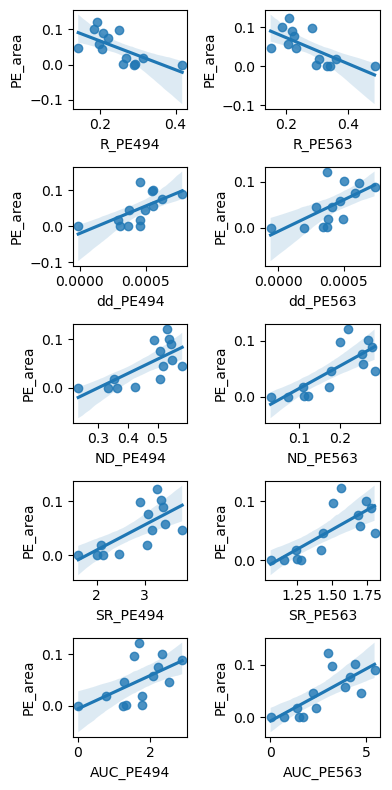

In [63]:
fig, axes = plt.subplots(5,2, figsize=(4,8))

sns.regplot(x="R_PE494", y="PE_area", data=samples_df, ax=axes[(0,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x="dd_PE494", y="PE_area", data=samples_df, ax=axes[(1,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x="ND_PE494", y="PE_area", data=samples_df, ax=axes[(2,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x="SR_PE494", y="PE_area", data=samples_df, ax=axes[(3,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x="AUC_PE494", y="PE_area", data=samples_df, ax=axes[(4,0)], ci=95, seed = 1, truncate=True)

sns.regplot(x="R_PE563", y="PE_area", data=samples_df, ax=axes[(0,1)], ci=95, seed = 1, truncate=True)
sns.regplot(x="dd_PE563", y="PE_area", data=samples_df, ax=axes[(1,1)], ci=95, seed = 1, truncate=True)
sns.regplot(x="ND_PE563", y="PE_area", data=samples_df, ax=axes[(2,1)], ci=95, seed = 1, truncate=True)
sns.regplot(x="SR_PE563", y="PE_area", data=samples_df, ax=axes[(3,1)], ci=95, seed = 1, truncate=True)
sns.regplot(x="AUC_PE563", y="PE_area", data=samples_df, ax=axes[(4,1)], ci=95, seed = 1, truncate=True)

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(4,8))

sns.regplot(x=CHL_indices[0], y="Chl_area", data=samples, ax=axes[(0,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x=CHL_indices[1], y="Chl_area", data=samples, ax=axes[(1,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x=CHL_indices[2], y="Chl_area", data=samples, ax=axes[(2,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x=CHL_indices[3], y="Chl_area", data=samples, ax=axes[(3,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x=CHL_indices[4], y="Chl_area", data=samples, ax=axes[(4,0)], ci=95, seed = 1, truncate=True)

sns.regplot(x=CHL_indices[5], y="Chl_area", data=samples, ax=axes[(0,1)], ci=95, seed = 1, truncate=True)
sns.regplot(x=CHL_indices[6], y="Chl_area", data=samples, ax=axes[(1,1)], ci=95, seed = 1, truncate=True)
# sns.regplot(x=CHL_indices[], y="PE_area", data=samples, ax=axes[(2,1)], ci=95, seed = 1, truncate=True)
# sns.regplot(x=CHL_indices[], y="PE_area", data=samples, ax=axes[(3,1)], ci=95, seed = 1, truncate=True)
# sns.regplot(x=CHL_indices[], y="PE_area", data=samples, ax=axes[(4,1)], ci=95, seed = 1, truncate=True)

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(4,8))

sns.regplot(x=PHEO_indices[0], y="Pheo_area", data=samples, ax=axes[(0,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x=PHEO_indices[1], y="Pheo_area", data=samples, ax=axes[(1,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x=PHEO_indices[2], y="Pheo_area", data=samples, ax=axes[(2,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x=PHEO_indices[3], y="Pheo_area", data=samples, ax=axes[(3,0)], ci=95, seed = 1, truncate=True)
sns.regplot(x=PHEO_indices[4], y="Pheo_area", data=samples, ax=axes[(4,0)], ci=95, seed = 1, truncate=True)

sns.regplot(x=PHEO_indices[5], y="Pheo_area", data=samples, ax=axes[(0,1)], ci=95, seed = 1, truncate=True)
sns.regplot(x=PHEO_indices[6], y="Pheo_area", data=samples, ax=axes[(1,1)], ci=95, seed = 1, truncate=True)
sns.regplot(x=PHEO_indices[7], y="Pheo_area", data=samples, ax=axes[(2,1)], ci=95, seed = 1, truncate=True)
# sns.regplot(x=CHL_indices[], y="_area", data=samples, ax=axes[(3,1)], ci=95, seed = 1, truncate=True)
# sns.regplot(x=CHL_indices[], y="_area", data=samples, ax=axes[(4,1)], ci=95, seed = 1, truncate=True)

plt.tight_layout()
plt.show()

## Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df_merged.head()

In [ ]:
dataset = df_merged.loc[:, ['PE_area','AUC_PE563', 'AUC_PE494','R_PE494','R_PE563','dd_PE494','dd_PE563']]

In [ ]:
# X features matrix
X = dataset.drop('PE_area', axis=1).values

# Target column (labels)
y = dataset['PE_area'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X = X.reshape(-1, 1)

In [ ]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
intercept = regressor.intercept_
coeff = regressor.coef_
rsq = regressor.score(X,y)

In [ ]:
print('Intercept: ' + str(regressor.intercept_))
print('Coefficient: ' + str(regressor.coef_))
print('R-squared: ' + str(regressor.score(X,y)))

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
plt.rcParams["figure.figsize"] = (12, 6) ## Matplotlib figure size

plt.scatter(X_train, y_train, color = "red", label='observed values')
plt.scatter(X_test, y_test, color = "blue", label='predicted values')
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.xlabel("AUC")
plt.ylabel("PE_area")
plt.legend()
#plt.tight_layout()
# plt.savefig(PATH_r + '/' +"model_plot_gg.png")
plt.show()

#### Numpy Linear Models

In [47]:
samples_df[PE_indices].corr()

,PE_area,R_PE563,R_PE569,AUC_PE563,AUC_PEF,dd_PE569
PE_area,1.000000,-0.681158,-0.676378,0.745314,0.718319,0.722188
R_PE563,-0.681158,1.000000,0.999652,-0.871882,-0.850479,-0.760859
R_PE569,-0.676378,0.999652,1.000000,-0.864853,-0.844545,-0.745966
AUC_PE563,0.745314,-0.871882,-0.864853,1.000000,0.991085,0.915253
AUC_PEF,0.718319,-0.850479,-0.844545,0.991085,1.000000,0.872518
dd_PE569,0.722188,-0.760859,-0.745966,0.915253,0.872518,1.000000


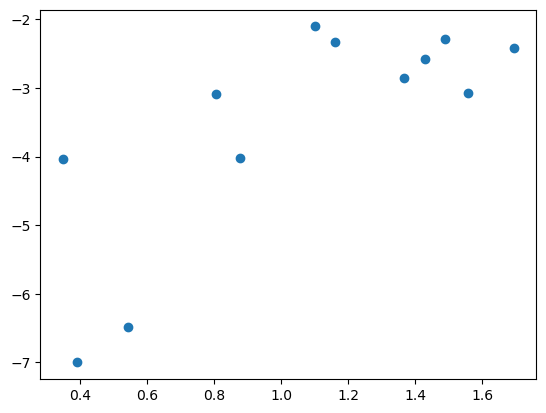

In [53]:
plt.scatter(x=np.log(samples_df['AUC_PE563']), y=np.log(samples_df['PE_area']))

In [67]:
reg = np.polyfit(samples_df['AUC_PE563'], samples_df['PE_area'], deg = 1)
reg

array([ 0.01982879, -0.00703093])

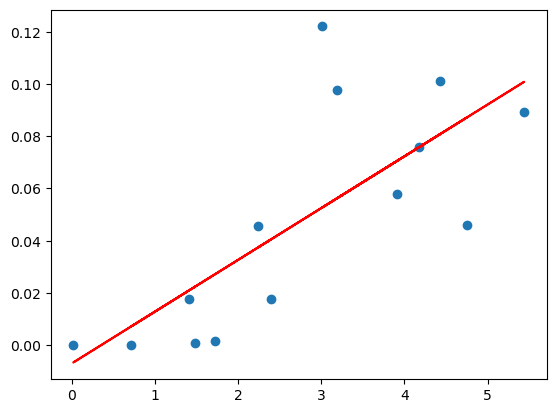

In [68]:
trend = np.polyval(reg, samples_df['AUC_PE563'])
plt.scatter(x=samples_df['AUC_PE563'], y=samples_df['PE_area'])
plt.plot(samples_df['AUC_PE563'], trend, 'r')

In [ ]:
predict = np.poly1d(reg)
predict(4)

0.07228422028496494

#### Statsmodels

In [34]:
import statsmodels.formula.api as smf

In [40]:
md = smf.mixedlm("PE_area ~ AUC_PE563", samples_df[PE_indices], groups=samples_df["Site"])

In [41]:
mdf = md.fit(method=["lbfgs"])

C:\Users\jcmontes\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [42]:
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PE_area
No. Observations: 14      Method:             REML   
No. Groups:       3       Scale:              0.0006 
Min. group size:  1       Log-Likelihood:     23.2145
Max. group size:  7       Converged:          Yes    
Mean group size:  4.7                                
-----------------------------------------------------
             Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    0.031    0.032 0.975 0.329 -0.032  0.095
AUC_PE563    0.007    0.008 0.841 0.400 -0.009  0.023
Group Var    0.001    0.062                          

